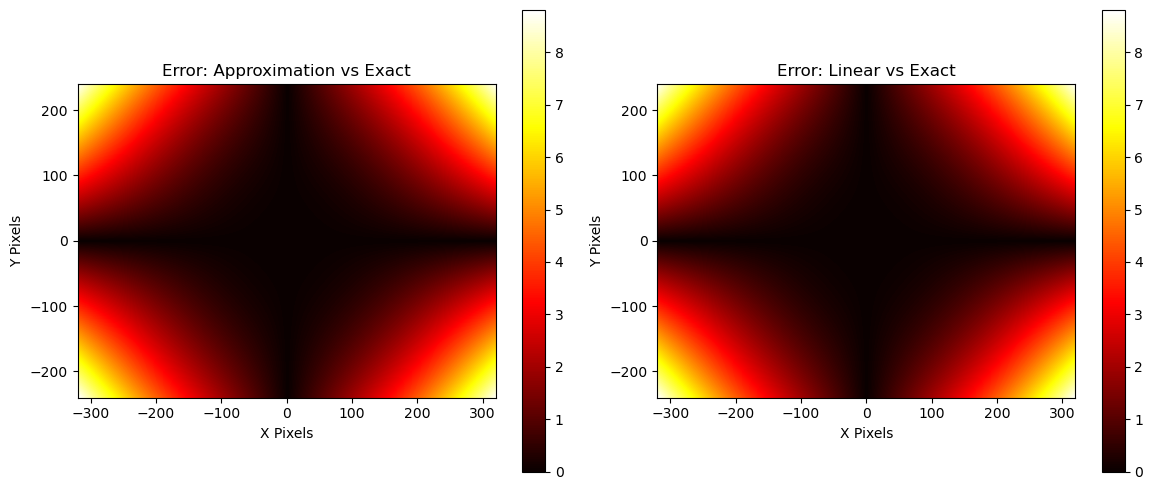

Average percent error for approximation: 4.94%
Average percent error for linear approximation: 4.94%


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define screen properties
width, height = 640, 480
half_width, half_height = width // 2, height // 2

# Define field of view (FoV)
fov_x = 45  # Degrees
fov_y = 30

# Initialize storage for errors
error_approx = np.zeros((height + 1, width + 1))
error_linear = np.zeros((height + 1, width + 1))
error_approx_percent = 0
error_linear_percent = 0

# Iterate through each pixel position and compute angles
angles_exact = {}
angles_approx = {}
angles_linear = {}
for p_x in range(-half_width, half_width + 1):
    for p_y in range(-half_height, half_height + 1):
        # Convert pixel positions to screen-space angles
        theta_x = (p_x / half_width) * np.radians(fov_x)
        theta_y = (p_y / half_height) * np.radians(fov_y)
        
        # Exact laser aiming angles
        alpha_exact = np.arctan(np.tan(theta_x) / np.sqrt(1 + np.tan(theta_y)**2))
        beta_exact = np.arctan(np.tan(theta_y) / np.sqrt(1 + np.tan(theta_x)**2))
        
        # Approximate laser aiming angles as independent
        alpha_approx = np.arctan(np.tan(theta_x))
        beta_approx = np.arctan(np.tan(theta_y))
        
        # Linear approximation (equal angle change per pixel)
        alpha_linear = (p_x / 320) * fov_x
        beta_linear = (p_y / 240) * fov_y
        
        # Store results
        angles_exact[(p_x, p_y)] = (np.degrees(alpha_exact), np.degrees(beta_exact))
        angles_approx[(p_x, p_y)] = (np.degrees(alpha_approx), np.degrees(beta_approx))
        angles_linear[(p_x, p_y)] = (alpha_linear, beta_linear)
        
        # Compute errors
        err_approx = np.sqrt((np.degrees(alpha_exact) - np.degrees(alpha_approx))**2 + 
                              (np.degrees(beta_exact) - np.degrees(beta_approx))**2)
        err_linear = np.sqrt((np.degrees(alpha_exact) - alpha_linear)**2 + 
                              (np.degrees(beta_exact) - beta_linear)**2)
        
        # Compute percent errors (skip division by zero case)
        if np.degrees(alpha_exact) == 0 and np.degrees(beta_exact) == 0:
            percent_error_approx = 0
            percent_error_linear = 0
        else:
            percent_error_approx = (err_approx / np.sqrt(np.degrees(alpha_exact)**2 + np.degrees(beta_exact)**2)) * 100
            percent_error_linear = (err_linear / np.sqrt(np.degrees(alpha_exact)**2 + np.degrees(beta_exact)**2)) * 100
        
        # Store errors
        error_approx[p_y + half_height, p_x + half_width] = err_approx
        error_linear[p_y + half_height, p_x + half_width] = err_linear
        error_approx_percent += percent_error_approx
        error_linear_percent += percent_error_linear

# Compute average percent errors
total_pixels = (height + 1) * (width + 1)
error_approx_percent /= total_pixels
error_linear_percent /= total_pixels

# Plot heatmaps of errors
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ax1 = axes[0]
c1 = ax1.imshow(error_approx, cmap='hot', extent=[-half_width, half_width, -half_height, half_height])
ax1.set_title("Error: Approximation vs Exact")
ax1.set_xlabel("X Pixels")
ax1.set_ylabel("Y Pixels")
fig.colorbar(c1, ax=ax1)

ax2 = axes[1]
c2 = ax2.imshow(error_linear, cmap='hot', extent=[-half_width, half_width, -half_height, half_height])
ax2.set_title("Error: Linear vs Exact")
ax2.set_xlabel("X Pixels")
ax2.set_ylabel("Y Pixels")
fig.colorbar(c2, ax=ax2)

plt.tight_layout()
plt.show()

print(f"Average percent error for approximation: {error_approx_percent:.5f}%")
print(f"Average percent error for linear approximation: {error_linear_percent:.5f}%")


In [9]:
import pandas as pd

# Convert the angles dictionaries into DataFrames
angles_exact_df = pd.DataFrame.from_dict(angles_exact, orient='index', columns=['alpha', 'beta'])
angles_approx_df = pd.DataFrame.from_dict(angles_approx, orient='index', columns=['alpha', 'beta'])
angles_linear_df = pd.DataFrame.from_dict(angles_linear, orient='index', columns=['alpha', 'beta'])

# Display them
print("Exact Angles:")
print(angles_exact_df)

print("\nApproximated Angles:")
print(angles_approx_df)

print("\nLinear Approximated Angles:")
print(angles_linear_df)


Exact Angles:
                  alpha       beta
(-320, -240) -40.893395 -22.207654
(-320, -239) -40.929022 -22.106693
(-320, -238) -40.964477 -22.005841
(-320, -237) -40.999758 -21.905097
(-320, -236) -41.034867 -21.804460
...                 ...        ...
(320, 236)    41.034867  21.804460
(320, 237)    40.999758  21.905097
(320, 238)    40.964477  22.005841
(320, 239)    40.929022  22.106693
(320, 240)    40.893395  22.207654

[308321 rows x 2 columns]

Approximated Angles:
              alpha    beta
(-320, -240)  -45.0 -30.000
(-320, -239)  -45.0 -29.875
(-320, -238)  -45.0 -29.750
(-320, -237)  -45.0 -29.625
(-320, -236)  -45.0 -29.500
...             ...     ...
(320, 236)     45.0  29.500
(320, 237)     45.0  29.625
(320, 238)     45.0  29.750
(320, 239)     45.0  29.875
(320, 240)     45.0  30.000

[308321 rows x 2 columns]

Linear Approximated Angles:
              alpha    beta
(-320, -240)  -45.0 -30.000
(-320, -239)  -45.0 -29.875
(-320, -238)  -45.0 -29.750
(-320, -237) 